**Objetivo da atividade:**

Utilizando o dataset "Mall Customers", disponível em https://www.kaggle.com/datasets/kandij/mall-customers, agrupar os clientes com base nas características de receita anual (Annual Income (k$)) e pontuação de gastos (Spending Score).

**EXERCÍCIO 01**
- Determine o valor ideal de k, com base no método Elbow.
- Treine o modelo e avalie a qualidade dos clusters, utilizando a métrica Silhoutte Score.

In [ ]:
# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dados = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
dados.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dados.info()

In [ ]:
dados.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Criando novo dataframe apenas com as colunas 'Annual Income (k$)',' Spending Score (1-100)'
df1 = dados.iloc[:,3:]
df1.head()

In [ ]:
dados.head()

In [ ]:
distorcoes = []
K = range(1,10)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df1)
    distorcoes.append(modelo01.inertia_)

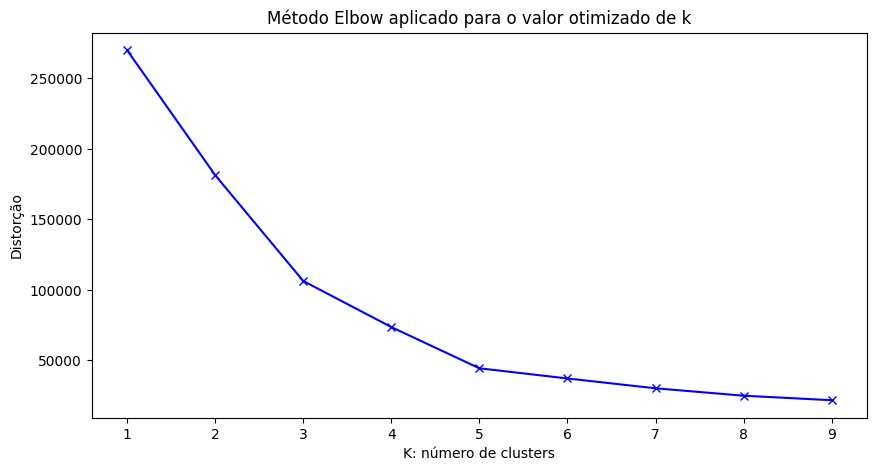

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [ ]:
modeloEx = KMeans(n_clusters=5)
modeloEx.fit(df1)

KMeans(n_clusters=5)

In [ ]:
# A partir do modelo treinado, fazemos as predições dos clusters e criamos uma coluna chamada "k_means"
df1['clusters'] = modeloEx.predict(df1)


In [ ]:
df1

In [ ]:
sil_score = silhouette_score(df1, modeloEx.labels_)
print(f"Silhouette score: {sil_score:.4f}")

Silhouette score: 0.5552


In [ ]:
modeloEx1 = KMeans(n_clusters=6)
modeloEx1.fit(df1)

KMeans(n_clusters=6)

In [ ]:
# A partir do modelo treinado, fazemos as predições dos clusters e criamos uma coluna chamada "k_means"
df1['clusters'] = modeloEx1.predict(df1)

In [ ]:
sil_score = silhouette_score(df1, modeloEx1.labels_)
print(f"Silhouette score: {sil_score:.4f}")

Silhouette score: 0.5425
